# Setup

In [53]:
import numpy as np
import matplotlib.pyplot as plt

sig = lambda z: 1/(1+np.exp(-z))
aux = lambda x: x*(1-x)

inputs = np.array([[0,0], [1,0], [0,1], [1,1]])
inputs = inputs.T

epoch = 2000
tda = 0.2

bj = [[0.5], [0.5], [0.5]]
bk = 0.5

targetFE = np.array([[1], [0], [0], [1]])
targetFE = targetFE.T
targetNAND = np.array([[1], [1], [1], [0]])
targetNAND = targetNAND.T

# Função de Equivalência sem Bias

Resultados apresentados pela RNA da Função de Equivalência: [[0.67451373 0.4305805  0.46672801 0.48595754]]
Resultados esperados: [[1 0 0 1]]

Pesos sinápticos finais em wIH:
 [[ 1.8566501   0.09776239 -3.5232578 ]
 [-0.61825163 -1.06345684 -3.55274631]]

Pesos sinápticos finais em wOH:
 [[ 0.39250503]
 [-1.31301655]
 [ 2.3816105 ]]


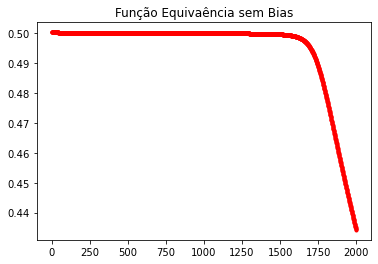

In [54]:

margem_erroFE = []
itrFE = []

np.random.seed(7)
wij = np.random.normal(0.0, pow(3, -0.5), (2,3))
wjk = np.random.normal(0.0, pow(3, -0.5), (3,1))

for i in range(epoch):
    saidas_i = inputs

    entradas_j = np.dot(wij.T, saidas_i)
    saidas_j = sig(entradas_j)

    entradas_k = np.dot(wjk.T, saidas_j)
    saida_FE = sig(entradas_k)

    erroRNA = targetFE - saida_FE
    mediaAbsoluta = np.mean(np.abs(erroRNA))
    erroCamadaj = np.dot(wjk,erroRNA)

    deltaCamadak = aux(saida_FE)
    deltaCamadak = erroRNA * deltaCamadak
    gradE_Wjk = np.dot(deltaCamadak,saidas_j.T)
    Delta_Wjk = tda * gradE_Wjk
    wjk = wjk + Delta_Wjk.T

    deltaCamadaj = aux(saidas_j)
    deltaCamadaj = erroCamadaj * deltaCamadaj
    gradE_Wij = np.dot(deltaCamadaj,saidas_i.T)
    Delta_Wij = tda * gradE_Wij
    wij = wij + Delta_Wij.T

    itrFE.append(i)
    margem_erroFE.append(mediaAbsoluta)

print("Resultados apresentados pela RNA da Função de Equivalência:", saida_FE)
print("Resultados esperados:", targetFE)

print("\nPesos sinápticos finais em wIH:\n", wij)
print("\nPesos sinápticos finais em wOH:\n", wjk)


plt.plot(itrFE, margem_erroFE, color='red', marker='o',linestyle='dashed',linewidth=2, markersize=3)
plt.title("Função Equivaência sem Bias")
plt.show()

# Função NAND sem Bias

Resultados apresentados pela RNA da Função de NAND: [[0.97240014 0.97075334 0.94099179 0.07763613]]
Resultados esperados: [[1 1 1 0]]

Pesos sinápticos finais em wIH:
 [[ 3.11824695 -1.30889155 -8.13614915]
 [-7.59764248  4.3156212   3.7104222 ]]

Pesos sinápticos finais em wOH:
 [[ 4.25951019]
 [-2.7171281 ]
 [ 5.5821492 ]]


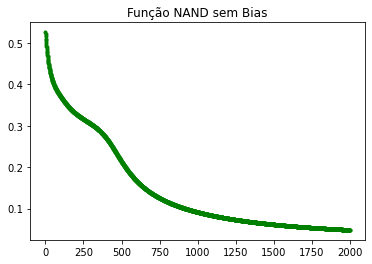

In [55]:
margem_erroNAND = []
itrNAND = []

#Reset dos pesos em relação às funções passadas
np.random.seed(7)
wij = np.random.normal(0.0, pow(3, -0.5), (2,3))
wjk = np.random.normal(0.0, pow(3, -0.5), (3,1))

for i in range(epoch):
    saidas_i = inputs

    entradas_j = np.dot(wij.T, saidas_i)
    saidas_j = sig(entradas_j)

    entradas_k = np.dot(wjk.T, saidas_j)
    saida_NAND = sig(entradas_k)

    erroRNA = targetNAND - saida_NAND
    mediaAbsoluta = np.mean(np.abs(erroRNA))

    erroCamadaj = np.dot(wjk,erroRNA)

    deltaCamadak = aux(saida_NAND)
    deltaCamadak = erroRNA * deltaCamadak
    gradE_Wjk = np.dot(deltaCamadak,saidas_j.T)
    Delta_Wjk = tda * gradE_Wjk
    wjk = wjk + Delta_Wjk.T

    deltaCamadaj = aux(saidas_j)
    deltaCamadaj = erroCamadaj * deltaCamadaj
    gradE_Wij = np.dot(deltaCamadaj,saidas_i.T)
    Delta_Wij =  tda * gradE_Wij
    wij = wij + Delta_Wij.T

    itrNAND.append(i)
    margem_erroNAND.append(mediaAbsoluta)

print("Resultados apresentados pela RNA da Função de NAND:", saida_NAND)
print("Resultados esperados:", targetNAND)

print("\nPesos sinápticos finais em wIH:\n", wij)
print("\nPesos sinápticos finais em wOH:\n", wjk)

plt.plot(itrNAND, margem_erroNAND, color='green', marker='o',linestyle='dashed',linewidth=2, markersize=3)
plt.title("Função NAND sem Bias")
plt.show()

# Função Equivalência com Bias

Resultados apresentados pela RNA da Função de Equivalência: [[0.9794731  0.01968279 0.01958404 0.9785075 ]]
Resultados esperados: [[1 0 0 1]]

Pesos sinápticos finais em wIH:
 [[ 0.93945016 -0.31732409 -0.21647912]
 [ 0.34052943 -0.41414746 -0.22331149]]

Pesos sinápticos finais em wOH:
 [[-0.1487625 ]
 [-2.72171114]
 [ 1.81473531]]

Bias camada j:
 [[-0.15720464  0.84745091  0.98927601  0.11597378]
 [-3.47177399  3.82116445  3.91081694 -2.86947948]
 [ 3.00108627 -2.59818279 -2.58725899  3.36275495]]

Bias camada k: [[ 2.28734041 -1.24135911 -1.25722084  2.28803675]]


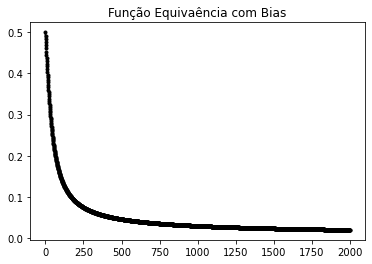

In [56]:
margem_erroFEb = []
itrFEb = []

#Reset dos pesos em relação às funções passadas
np.random.seed(7)
wij = np.random.normal(0.0, pow(3, -0.5), (2,3))
wjk = np.random.normal(0.0, pow(3, -0.5), (3,1))

bj = [[0.5], [0.5], [0.5]]
bk = 0.5

for i in range(epoch):
    saidas_i = inputs

    entradas_j = np.dot(wij.T, saidas_i) + bj
    saidas_j = sig(entradas_j)

    entradas_k = np.dot(wjk.T, saidas_j) + bk
    saida_FE = sig(entradas_k)

    erroRNA = targetFE - saida_FE
    mediaAbsoluta = np.mean(np.abs(erroRNA))

    erroCamadaj = np.dot(wjk,erroRNA)

    deltaCamadak = aux(saida_FE)
    deltaCamadak = erroRNA * deltaCamadak
    gradE_Wjk = np.dot(deltaCamadak,saidas_j.T)
    Delta_Wjk = tda * gradE_Wjk
    wjk = wjk + Delta_Wjk.T
    bk = bk + tda * deltaCamadak

    deltaCamadaj = aux(saidas_j)
    deltaCamadaj = erroCamadaj * deltaCamadaj
    
    gradE_Wij = np.dot(deltaCamadaj,saidas_i.T)
    Delta_Wij = tda * gradE_Wij
    wij = wij + Delta_Wij.T
    bj = bj + tda * deltaCamadaj

    itrFEb.append(i)
    margem_erroFEb.append(mediaAbsoluta)

print("Resultados apresentados pela RNA da Função de Equivalência:", saida_FE)
print("Resultados esperados:", targetFE)

print("\nPesos sinápticos finais em wIH:\n", wij)
print("\nPesos sinápticos finais em wOH:\n", wjk)
print("\nBias camada j:\n", bj)
print("\nBias camada k:", bk)


plt.plot(itrFEb, margem_erroFEb, color='k', marker='o',linestyle='dashed',linewidth=2, markersize=3)
plt.title("Função Equivaência com Bias")
plt.show()

# Função NAND com Bias

Resultados apresentados pela RNA da Função de NAND: [[0.98459145 0.9846901  0.9844129  0.02522672]]
Resultados esperados: [[1 1 1 0]]

Pesos sinápticos finais em wIH:
 [[ 0.22643883 -0.13838392 -0.38599579]
 [-0.30979589 -0.24805557 -0.38628204]]

Pesos sinápticos finais em wOH:
 [[ 0.40572144]
 [-1.72758676]
 [ 2.43415486]]

Bias camada j:
 [[ 1.31976541  1.11758025  1.32209137 -0.86716689]
 [-2.54251692 -2.46387463 -2.38707043  3.59449978]
 [ 3.13758084  3.45787347  3.47534339 -2.86281799]]

Bias camada k: [[ 1.63050054  1.63515159  1.63578984 -2.1698337 ]]


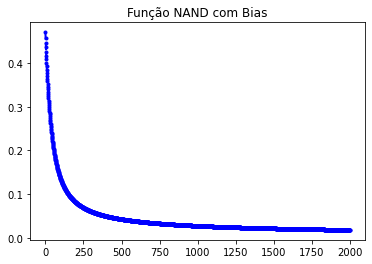

In [57]:
margem_erroNANDb = []
itrNANDb = []

#Reset dos pesos em relação às funções passadas
np.random.seed(7)
wij = np.random.normal(0.0, pow(3, -0.5), (2,3))
wjk = np.random.normal(0.0, pow(3, -0.5), (3,1))

#Reset bias relação às funções passadas
bj = [[0.5], [0.5], [0.5]]
bk = 0.5

for i in range(epoch):
    saidas_i = inputs

    entradas_j = np.dot(wij.T, saidas_i) + bj
    saidas_j = sig(entradas_j)

    entradas_k = np.dot(wjk.T, saidas_j) + bk
    saida_NAND = sig(entradas_k)

    erroRNA = targetNAND - saida_NAND
    mediaAbsoluta = np.mean(np.abs(erroRNA))

    erroCamadaj = np.dot(wjk,erroRNA)

    deltaCamadak = aux(saida_NAND)
    deltaCamadak = erroRNA * deltaCamadak
    gradE_Wjk = np.dot(deltaCamadak,saidas_j.T)
    Delta_Wjk = tda * gradE_Wjk
    wjk = wjk + Delta_Wjk.T
    bk = bk + tda * deltaCamadak

    deltaCamadaj = aux(saidas_j)
    deltaCamadaj = erroCamadaj * deltaCamadaj
    gradE_Wij = (-1) * np.dot(deltaCamadaj,saidas_i.T)
    Delta_Wij = (-1) * tda * gradE_Wij
    wij = wij + Delta_Wij.T
    bj = bj + tda * deltaCamadaj

    itrNANDb.append(i)
    margem_erroNANDb.append(mediaAbsoluta)

print("Resultados apresentados pela RNA da Função de NAND:", saida_NAND)
print("Resultados esperados:", targetNAND)

print("\nPesos sinápticos finais em wIH:\n", wij)
print("\nPesos sinápticos finais em wOH:\n", wjk)
print("\nBias camada j:\n", bj)
print("\nBias camada k:", bk)

plt.plot(itrNANDb, margem_erroNANDb, color='blue', marker='o',linestyle='dashed',linewidth=2, markersize=3)
plt.title("Função NAND com Bias")
plt.show()

# Gráfico Geral


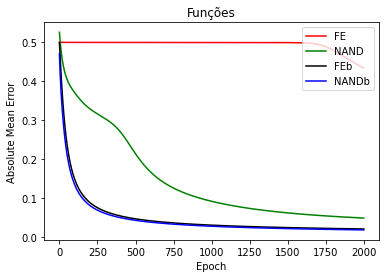

In [58]:
plt.xlabel('Epoch')
plt.ylabel("Absolute Mean Error")

plt.plot(itrFE, margem_erroFE, 'r-', label='FE')
plt.plot(itrNAND, margem_erroNAND, 'g-', label='NAND')
plt.plot(itrFEb, margem_erroFEb, 'k-', label='FEb')
plt.plot(itrNANDb, margem_erroNANDb, 'b-',label='NANDb')

plt.legend(loc="upper right")
plt.title('Funções')
plt.show()
